In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Import Data

In [2]:
healthanxiety_pre = pd.read_csv('../../data/healthanxiety_pre_features_tfidf_256.csv')
healthanxiety_post = pd.read_csv('../../data/healthanxiety_post_features_tfidf_256.csv')

In [3]:
healthanxiety_pre.head(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,healthanxiety,Mystik-Palace,2019/06/20,Eating out too much has given me bad health an...,5.800752,6.211303,6.908797,74.536579,66.894737,10.023058,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.072686
1,healthanxiety,IIIIIIIVVVIVII,2019/06/20,Extremely worried about the paint in my apartm...,7.280769,6.352069,6.437222,83.642500,64.128205,8.483761,...,0.0,0.0,0.00000,0.0,0.274031,0.0,0.000000,0.0,0.0,0.000000
2,healthanxiety,CSThr0waway123,2019/06/20,How Intuniv/Guanfacine (an ADHD medication) re...,8.171790,7.817800,8.663357,66.524531,62.076923,11.996233,...,0.0,0.0,0.06105,0.0,0.000000,0.0,0.079981,0.0,0.0,0.036252


In [4]:
healthanxiety_pre.tail(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
4251,healthanxiety,esurks,2019/08/03,Want to create a YouTube place for members her...,5.960374,6.041058,6.184385,81.002460,66.540107,8.511230,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4252,healthanxiety,tinababyx,2019/08/03,It’s hard for me to make friends and be very s...,1.064891,3.025142,2.883197,92.499440,81.540984,5.706011,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4253,healthanxiety,Goprokimchi,2019/08/03,Sudden pains appearing all over my body!! So f...,7.157242,6.409725,6.819147,80.211641,64.290698,9.970026,...,0.0,0.0,0.0,0.0,0.0,0.120379,0.0,0.0,0.0,0.0


## Features

1. The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  

2. The question we are asking is:  How has the substance use increased over the pandemic?
  
- Feature of interest: `substance_use_total`
  
- In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*. 
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [5]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

healthanxiety_pre = healthanxiety_pre.loc[:, columns_of_interest]
healthanxiety_post = healthanxiety_post.loc[:, columns_of_interest]

In [6]:
healthanxiety_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,healthanxiety,Mystik-Palace,2019/06/20,Eating out too much has given me bad health an...,0
1,healthanxiety,IIIIIIIVVVIVII,2019/06/20,Extremely worried about the paint in my apartm...,0
2,healthanxiety,CSThr0waway123,2019/06/20,How Intuniv/Guanfacine (an ADHD medication) re...,0
3,healthanxiety,iridescentlichen,2019/06/20,Anxiety about child dry drowning Earlier I was...,0
4,healthanxiety,Liverpoollondon,2019/06/20,Tonsils out I have health anxiety ...for mysel...,0


In [7]:
healthanxiety_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            4254 non-null   object
 1   author               4254 non-null   object
 2   date                 4254 non-null   object
 3   post                 4254 non-null   object
 4   substance_use_total  4254 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 166.3+ KB


In [8]:
healthanxiety_post.head(5)

,subreddit,author,date,post,substance_use_total
0,healthanxiety,ceemillar,2020/01/01,Motor neurone diesease Hi all I’m a 30 year ol...,0
1,healthanxiety,bombosquambo,2020/01/01,Abdominal Reflexes Has anyone here ever tried ...,0
2,healthanxiety,KramGrubnederv,2020/01/01,What the flying fladoodle! I have had an eatin...,1
3,healthanxiety,BPD_Queen_,2020/01/01,Anyone else had chest pain from too much activ...,3
4,healthanxiety,oriane_,2020/01/01,"Heart anxiety Hi all, \n\nI'm new to the sub b...",0


In [9]:
healthanxiety_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            2427 non-null   object
 1   author               2427 non-null   object
 2   date                 2427 non-null   object
 3   post                 2427 non-null   object
 4   substance_use_total  2427 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 94.9+ KB


### Composition

> There are no missing values from the dataset.

In [10]:
print(f'Total number of records in the pre-pandemic dataset: {len(healthanxiety_pre)}')
healthanxiety_pre.describe()

Total number of records in the pre-pandemic dataset: 4254


,substance_use_total
count,4254.000000
mean,0.608369
std,1.166539
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,20.000000


In [11]:
print(f'Total number of records in the post-pandemic dataset: {len(healthanxiety_post)}')
healthanxiety_post.describe()

Total number of records in the post-pandemic dataset: 2427


,substance_use_total
count,2427.000000
mean,0.609394
std,1.164483
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,17.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [12]:
healthanxiety_pre['period'] = 'pre'
healthanxiety_post['period'] = 'post'

healthanxiety_df = pd.concat([healthanxiety_post, healthanxiety_pre])
healthanxiety_df

,subreddit,author,date,post,substance_use_total,period
0,healthanxiety,ceemillar,2020/01/01,Motor neurone diesease Hi all I’m a 30 year ol...,0,post
1,healthanxiety,bombosquambo,2020/01/01,Abdominal Reflexes Has anyone here ever tried ...,0,post
2,healthanxiety,KramGrubnederv,2020/01/01,What the flying fladoodle! I have had an eatin...,1,post
3,healthanxiety,BPD_Queen_,2020/01/01,Anyone else had chest pain from too much activ...,3,post
4,healthanxiety,oriane_,2020/01/01,"Heart anxiety Hi all, \n\nI'm new to the sub b...",0,post
...,...,...,...,...,...,...
4249,healthanxiety,betabrains,2019/08/03,"MS or ALS at 34? Hello, I'm not sure if this i...",0,pre
4250,healthanxiety,danel_jonis1,2019/08/03,"NuRadiance Lift:-Ingredients, Side Effects &am...",0,pre
4251,healthanxiety,esurks,2019/08/03,Want to create a YouTube place for members her...,1,pre
4252,healthanxiety,tinababyx,2019/08/03,It’s hard for me to make friends and be very s...,0,pre


### Visualization

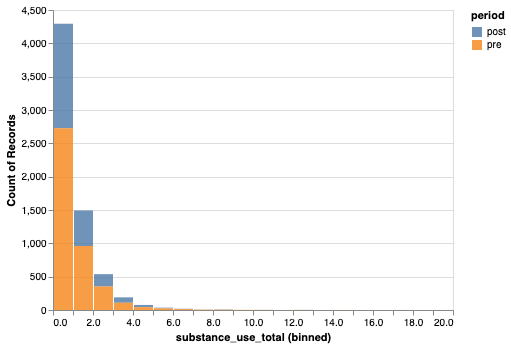

In [13]:
alt.Chart(healthanxiety_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(healthanxiety_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(healthanxiety_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 4254
Number of unique authors (posters) in 'post' dataset: 2427


**From above figures, it can be summarized that:**

1. Each observation in each dataset is associated with a unique reddit user.
2. There are less unique authors posting in this subreddit post pandemic. This is likely because the `post` dataset covers a 4-month period while the `pre` data set covers a whole year period. 
3. However, the `substance_use_total` post pandemic is higher as shown in the plot. 